In [21]:
import pandas as pd
import numpy as np
import re
cardata = pd.read_csv('ebay_car_scrapped_dataset.csv',encoding='latin-1')

In [22]:
cardata["Car Price"] = cardata["Car Price"].apply(lambda x:re.sub("\D", "", x.split(".")[0]))
cardata["Car Price Original"] = cardata["Car Price"]
cardata["Car Price"] = cardata["Car Price"].astype(int)

In [3]:
bins = [0, 20000, 50000,999999]
labels = ['1', '2', '3']
cardata["Car Price"] = pd.cut(x = cardata["Car Price"], bins = bins, labels = labels, include_lowest = True)

In [4]:
cardata['Car Price'].value_counts()

2    1181
1    1179
3    1100
Name: Car Price, dtype: int64

In [23]:
cardata = cardata.dropna(axis=1)

In [25]:
cardata = cardata.dropna(axis=0)

In [26]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

traindata = pd.get_dummies(cardata.drop(['Year:','Car Price','Report Car Name','VIN (Vehicle Identification Number):','Make:','Car Price Original'],axis=1))
testdata = cardata['Car Price']
xtrain,xtest,ytrain,ytest = train_test_split(traindata,testdata,test_size=0.2,random_state=101)


In [27]:
k = xtrain.copy(deep=True)

In [28]:
k['price'] = ytrain

/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

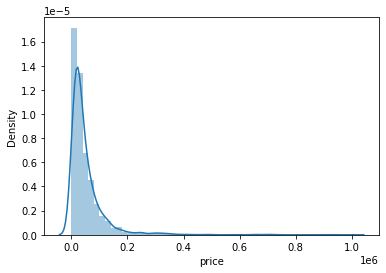

In [30]:
import seaborn as sns
sns.distplot(k['price'])

In [11]:
ytrain.value_counts()

1    959
2    949
3    860
Name: Car Price, dtype: int64

In [7]:
regex = re.compile(r"\[|\]|<|:", re.IGNORECASE)

In [8]:
cardata.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<',':'))) else col for col in cardata.columns.values]

In [9]:
cardata.columns

Index(['Car Name', 'Car Price', 'Year_',
       'VIN (Vehicle Identification Number)_', 'Make_', 'Condition_',
       'Report Car Name', 'State Title Brand Reported', 'Accidents Reported',
       'Damage Reported', 'Odometer', 'Open Recall', 'Car Price Original'],
      dtype='object')

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=101, multi_class='multinomial', penalty='none', solver='newton-cg')
model = model.fit(xtrain, ytrain)
preds = model.predict(xtest)
print('\t\tLogistic Regression')
print('\n')
print(classification_report(ytest,preds))

		Logistic Regression


              precision    recall  f1-score   support

           1       0.61      0.57      0.59       220
           2       0.74      0.35      0.47       232
           3       0.56      0.88      0.68       240

    accuracy                           0.60       692
   macro avg       0.64      0.60      0.58       692
weighted avg       0.64      0.60      0.58       692



In [11]:
xtrain.shape

(2768, 2577)

In [12]:
xtest.shape

(692, 2577)

In [23]:
import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(ytest,model.predict_proba(xtest),multi_class='ovr'))

0.7659403306440694


In [24]:
#optimized MODEL FOR NB 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print('\t\tNaive Bayes Classifier')
print('\n')
print(classification_report(ytest,nb.predict(xtest)))

		Naive Bayes Classifier


              precision    recall  f1-score   support

           1       0.84      0.34      0.49       220
           2       0.85      0.29      0.43       232
           3       0.45      0.97      0.61       240

    accuracy                           0.54       692
   macro avg       0.71      0.53      0.51       692
weighted avg       0.71      0.54      0.51       692



In [25]:
import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(ytest,nb.predict_proba(xtest),multi_class='ovr'))

0.6556480477436194


In [30]:
#SVC BASE MODEL
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain,ytrain)
print('\t\tSupport Vector Machine Classifier')
print('\n')
print(classification_report(ytest,svc.predict(xtest)))

		Support Vector Machine Classifier


              precision    recall  f1-score   support

           1       0.48      0.26      0.34       220
           2       0.49      0.35      0.41       232
           3       0.49      0.82      0.61       240

    accuracy                           0.49       692
   macro avg       0.49      0.48      0.45       692
weighted avg       0.49      0.49      0.46       692



In [18]:
from sklearn.ensemble import RandomForestClassifier


rd = RandomForestClassifier(random_state=101)
rd.fit(xtrain,ytrain)
pred = rd.predict(xtest)
print('\t\tRandom Forest Classifier')
print('\n')
print(classification_report(ytest,pred))

		Random Forest Classifier


              precision    recall  f1-score   support

           1       0.57      0.63      0.60       220
           2       0.72      0.33      0.45       232
           3       0.58      0.84      0.69       240

    accuracy                           0.60       692
   macro avg       0.63      0.60      0.58       692
weighted avg       0.63      0.60      0.58       692



In [26]:
import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(ytest,rd.predict_proba(xtest),multi_class='ovr'))

0.7641725688308402


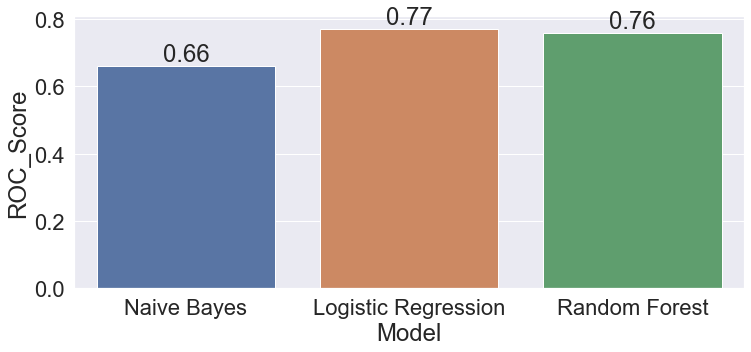

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
k = pd.DataFrame({'Model':['Naive Bayes','Logistic Regression','Random Forest'],'ROC_Score':[0.66,0.77,0.76]})
sns.set(font_scale=2)
plt.figure(figsize=(12,5))
ax = sns.barplot(data=k,x='Model',y='ROC_Score')
for i in ax.containers:
    ax.bar_label(i,)